# import分はまとめる

In [33]:
import matplotlib.style
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

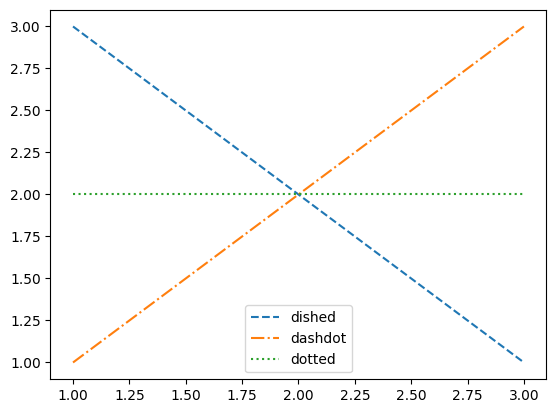

In [2]:
fig, ax = plt.subplots()
# 破線で描写
ax.plot([1,3],[3,1], linestyle='--', label='dished')
# 1点鎖栓で描写
ax.plot([1,3],[1,3], linestyle='-.', label='dashdot')
# 点線で描写
ax.plot([1,3],[2,2], linestyle=':', label='dotted')
ax.legend()

plt.show()

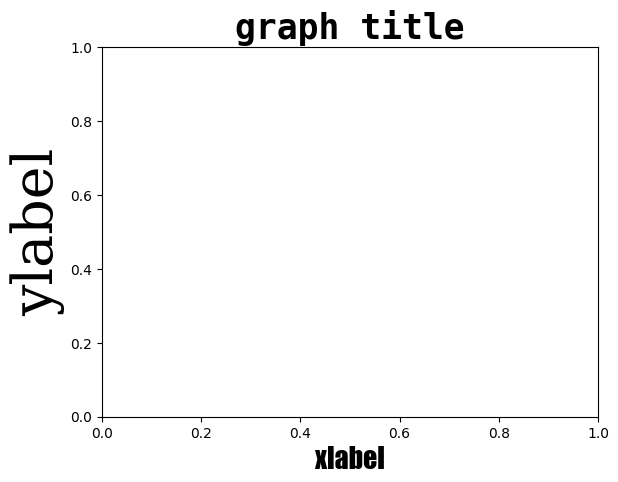

In [3]:
fig,ax = plt.subplots()

ax.set_xlabel('xlabel', family='fantasy', size=20, weight='bold')
ax.set_ylabel('ylabel', family='serif', size=40, weight='light')
ax.set_title('graph title', family='monospace', size=25, weight='heavy')

plt.show()

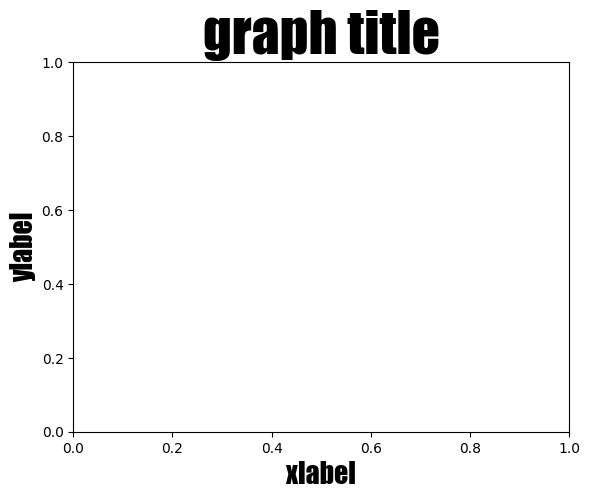

In [4]:
fontdict = {
    'family':'fantasy',
    'size':20,
    'weight':'normal'
}

fig,ax = plt.subplots()

ax.set_xlabel('xlabel',fontdict=fontdict)
ax.set_ylabel('ylabel', fontdict=fontdict)
# 個別指定で変更可能
ax.set_title('graph title', fontdict=fontdict, size=40)

plt.show()

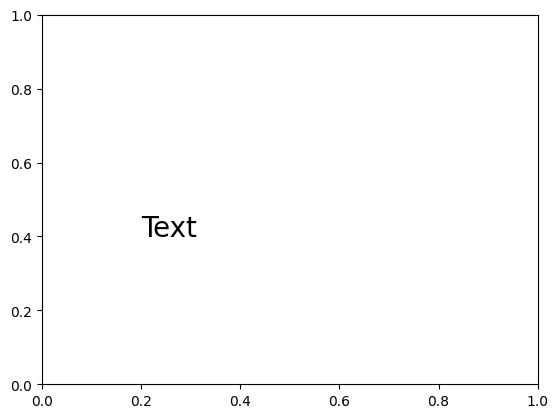

In [5]:
fig, ax = plt.subplots()

ax.text(0.2,0.4,'Text',size=20) # 'Text'というテキストを描画
plt.show()

## Pandasオブジェクトからの描写

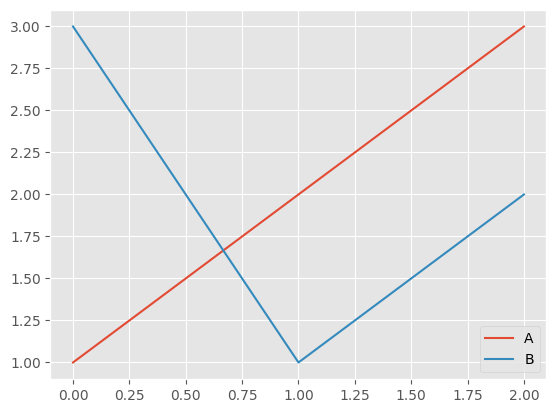

In [8]:
matplotlib.style.use('ggplot') # スタイルを指定

# DataFrameを作成
df = pd.DataFrame({'A':[1,2,3],
                   'B':[3,1,2],})
df.plot() # 折れ線グラフを描写
plt.show()

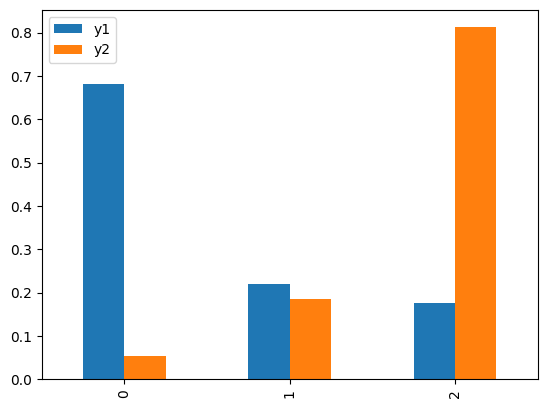

In [2]:
# ランダムな2行3列のデータを作成する
rng = np.random.default_rng(123)
df_rng = pd.DataFrame(rng.random((3,2)),
                      columns=['y1','y2'])
df_rng.plot.bar() # 棒グラフを描写
plt.show()

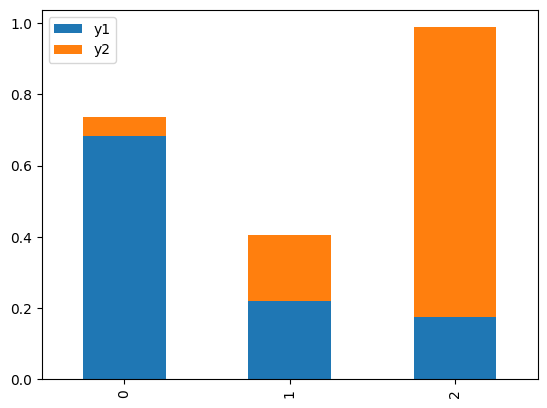

In [3]:
df_rng.plot.bar(stacked=True)
plt.show()

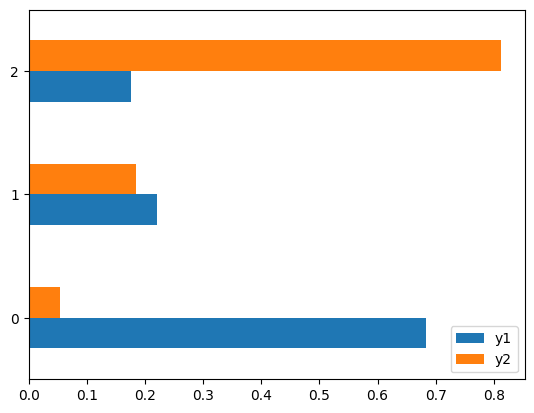

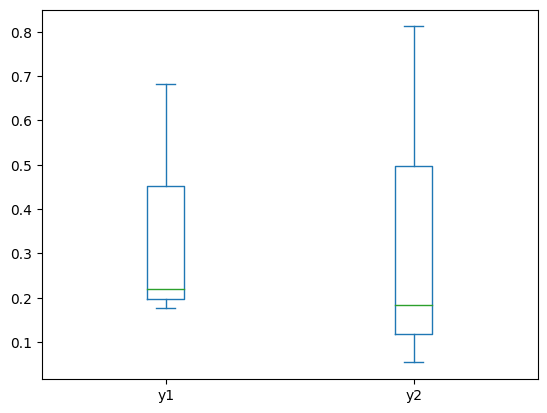

In [4]:
df_rng.plot.barh()
df_rng.plot.box()
plt.show()

# sckit-learn

In [5]:
# サンプルのデータセットを作成
df = pd.DataFrame({
    'A':[1, np.nan, 3, 4, 5],
    'B':[6, 7, 8, np.nan, 10],
    'C':[11, 12, 13, 14, 15]
})
df

,A,B,C
0,1.0,6.0,11
1,NaN,7.0,12
2,3.0,8.0,13
3,4.0,NaN,14
4,5.0,10.0,15


## 簡単な欠損処理

In [8]:
# 欠損値の確認
df.isnull()

,A,B,C
0,False,False,False
1,True,False,False
2,False,False,False
3,False,True,False
4,False,False,False


In [10]:
# Sklearnのライブラリで平均値を埋めるのは初
imp = SimpleImputer(strategy='mean')
# 欠損値の補完
imp.fit_transform(df)

array([[ 1.  ,  6.  , 11.  ],
       [ 3.25,  7.  , 12.  ],
       [ 3.  ,  8.  , 13.  ],
       [ 4.  ,  7.75, 14.  ],
       [ 5.  , 10.  , 15.  ]])

## カテゴリ変数の処理

In [15]:
df = pd.DataFrame({
    'A':[1, 2, 3, 4, 5],
    'B':['a', 'b', 'a', 'b', 'c']
})
df

,A,B
0,1,a
1,2,b
2,3,a
3,4,b
4,5,c


In [16]:
# ラベルエンコーダのインスタンスを作成
le = LabelEncoder()
# ラベルエンコーディング
le.fit_transform(df.loc[:,'B'])

array([0, 1, 0, 1, 2])

In [17]:
# 元の値を確認
le.classes_

array(['a', 'b', 'c'], dtype=object)

## OneHotエンコーディング

In [22]:
# DFのコピー
df_ohe = df.copy()
# ラベルエンコーダのインスタンス化
le = LabelEncoder()
# 英語の'a', 'b', 'c'を0,1,2へ変換
df_ohe.loc[:,'B'] = le.fit_transform(df_ohe.loc[:,'B'])

# OneHotエンコーダのインスタンス化[1]はカラムを指定
ohe = ColumnTransformer([('OneHotEncoder',
                         OneHotEncoder(),[1])],
                        remainder='passthrough')
# OneHotエンコーディング
df_ohe = ohe.fit_transform(df_ohe)
df_ohe

array([[1., 0., 0., 1.],
       [0., 1., 0., 2.],
       [1., 0., 0., 3.],
       [0., 1., 0., 4.],
       [0., 0., 1., 5.]])

## 特徴量の正規化

In [23]:
# dfを作成する
df = pd.DataFrame({
    'A':[1,2,3,4,5],
    'B':[100,200,300,400,800]
})
df

,A,B
0,1,100
1,2,200
2,3,300
3,4,400
4,5,800


### 分散正規化

In [25]:
# 分散正規化のインスタンスを作成
stdsc = StandardScaler()
# 分散正規化を実行
stdsc.fit_transform(df)

array([[-1.41421356, -1.07588766],
       [-0.70710678, -0.66208471],
       [ 0.        , -0.24828177],
       [ 0.70710678,  0.16552118],
       [ 1.41421356,  1.82073295]])

### 最小最大正規化

In [27]:
# 最小最大正規化のインスタンスの作成
mmsc = MinMaxScaler()
# 最小最大正規化の実行
mmsc.fit_transform(df)

array([[0.        , 0.        ],
       [0.25      , 0.14285714],
       [0.5       , 0.28571429],
       [0.75      , 0.42857143],
       [1.        , 1.        ]])

## 分類

In [29]:
# irisのデータセットを読み込む
iris = load_iris()
X, y = iris.data, iris.target
# 先頭の5行を表示
print('X:')
print(X[:5,:])
print('y:')
print(y[:5])

X:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
y:
[0 0 0 0 0]


In [31]:
# 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
print(X_train.shape)
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(105, 4)
(105,)
(45,)


### SVM
- 分類・回帰だけではなく外れ値にも使えるアルゴリズム

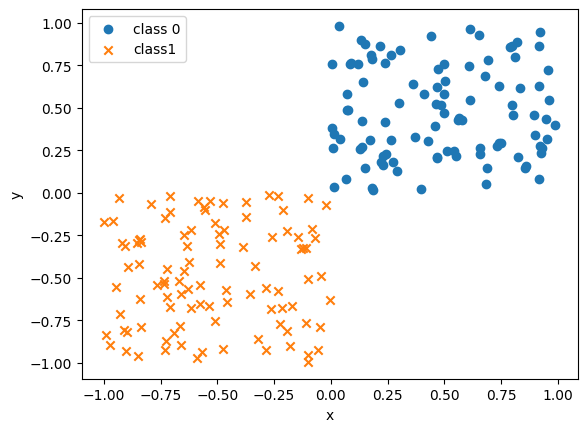

In [32]:
# 乱数シードを固定
from cProfile import label


rng = np.random.default_rng(123)

# x軸y軸ともに0から1までの一様分布から100点をサンプリング
X0 = rng.uniform(size=(100,2))
# クラス0のラベルを100個作成
y0 = np.repeat(0,100)

# x軸y軸ともに-1から0までの一様分布から100点をサンプリング
X1 = rng.uniform(-1,0.0,size=(100,2))
# クラス1のラベルを作成
y1 = np.repeat(1, 100)

# 散布図にプロット
fig, ax = plt.subplots()

ax.scatter(X0[:,0],X0[:,1],
           marker='o', label='class 0')

ax.scatter(X1[:,0],X1[:,1],
           marker='x', label='class1')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

plt.show()

In [ ]:
# 学習、および決定境界、マージン、サポートベクタを可視化する関数
#!